In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

from stats import *
from sentiment_stats import *

from peewee import SQL
from database.models import RawFacebookComments, RawTwitterComments, RawInstagramComments, RawYouTubeComments, RawHashtagComments

rede_social = 'YouTube'
modelo = RawYouTubeComments

cores = ['#FFA726', '#66BB6A', '#42A5F5', '#FFEE58', '#EF5350', '#AB47BC', '#C8C8C8']
cores2 = ['#FFA726', '#AB47BC', '#FFEE58', '#C8C8C8', '#EF5350', '#66BB6A', '#42A5F5']
cores_val = ['#EF5350', '#C8C8C8', '#66BB6A']
cores_val2 = ['#66BB6A', '#EF5350', '#C8C8C8']
sentimentos = ['ALEGRIA', 'SURPRESA', 'TRISTEZA', 'MEDO', 'RAIVA', 'DESGOSTO', 'NEUTRO']
valencia = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

valencia_dict = OrderedDict()
for val in valencia:
    valencia_dict[val] = 0

sentimentos_dict = OrderedDict()
for sentimento in sentimentos:
    sentimentos_dict[sentimento] = 0
    
default_clause = [
    SQL('length(clean_comment) > 0'),
]

positivo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO"')
]

negativo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO"')
]

neutro_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("NEUTRO") AND valence = "NEUTRO"')
]

general = default_clause + [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL("""
        (emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO") 
        OR 
        (emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO")
        OR
        (emotion in ("NEUTRO") AND valence = "NEUTRO")
    """)
]

### Emoções gerais dos comentários : YouTube

In [2]:
total_comentarios = modelo.select() \
        .where(default_clause) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general)) \
        .order_by(modelo.hash)

In [3]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do YouTube:
--------------------
Total de Comentários  : 8487
Comentários Positivos : 1844
Comentários Negativos : 1841
Comentários Neutros   : 77

Porcentagem de comentários:
--------------------
Comentários Positivos : 21.73%
Comentários Negativos : 21.69%
Comentários Neutros   : 0.91%
Total                 : 44.33%


#### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,1844,1841,77


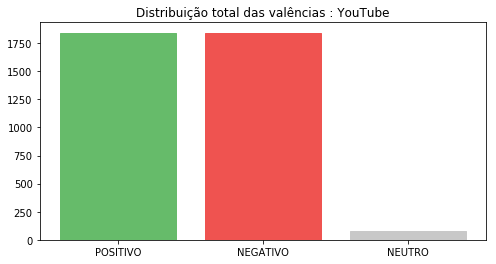

In [4]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

#### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1834,10,1666,2,7,166,77


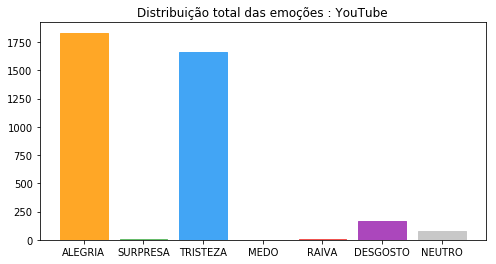

In [5]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

### Emoções por candidato : YouTube

#### Jair Bolsonaro

In [12]:
candidato_c = [modelo.candidate == 'Jair Bolsonaro']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [13]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do YouTube:
--------------------
Total de Comentários  : 3929
Comentários Positivos : 926
Comentários Negativos : 951
Comentários Neutros   : 18

Porcentagem de comentários:
--------------------
Comentários Positivos : 23.57%
Comentários Negativos : 24.2%
Comentários Neutros   : 0.46%
Total                 : 48.23%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,926,951,18


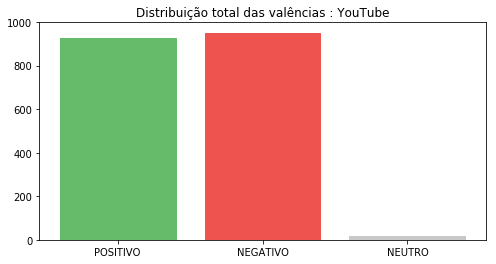

In [14]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,919,7,857,2,5,87,18


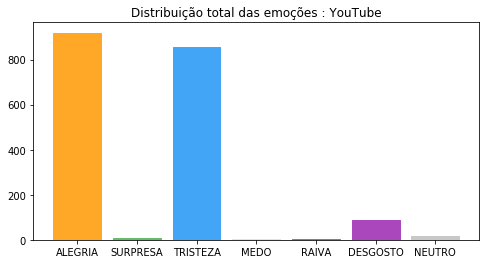

In [15]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Ciro Gomes

In [16]:
candidato_c = [modelo.candidate == 'Ciro Gomes']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [17]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do YouTube:
--------------------
Total de Comentários  : 1884
Comentários Positivos : 485
Comentários Negativos : 323
Comentários Neutros   : 20

Porcentagem de comentários:
--------------------
Comentários Positivos : 25.74%
Comentários Negativos : 17.14%
Comentários Neutros   : 1.06%
Total                 : 43.95%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,485,323,20


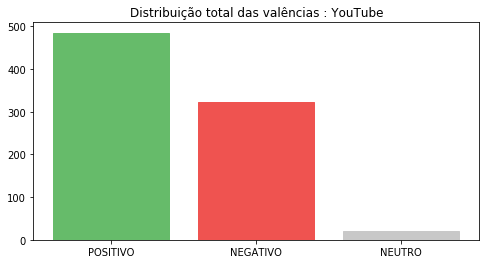

In [18]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,484,1,301,0,2,20,20


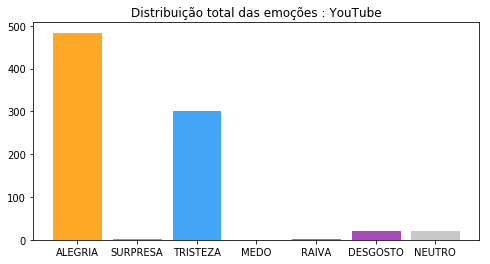

In [19]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Geraldo Alckmin

In [20]:
candidato_c = [modelo.candidate == 'Geraldo Alckmin']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [21]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do YouTube:
--------------------
Total de Comentários  : 908
Comentários Positivos : 166
Comentários Negativos : 218
Comentários Neutros   : 17

Porcentagem de comentários:
--------------------
Comentários Positivos : 18.28%
Comentários Negativos : 24.01%
Comentários Neutros   : 1.87%
Total                 : 44.16%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,166,218,17


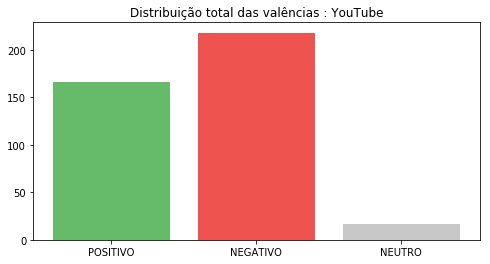

In [22]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,166,0,198,0,0,20,17


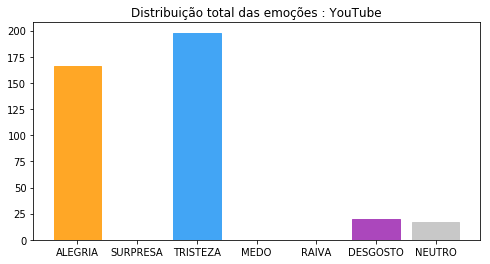

In [23]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Marina Silva

In [24]:
candidato_c = [modelo.candidate == 'Marina Silva']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [25]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do YouTube:
--------------------
Total de Comentários  : 1766
Comentários Positivos : 267
Comentários Negativos : 349
Comentários Neutros   : 22

Porcentagem de comentários:
--------------------
Comentários Positivos : 15.12%
Comentários Negativos : 19.76%
Comentários Neutros   : 1.25%
Total                 : 36.13%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,267,349,22


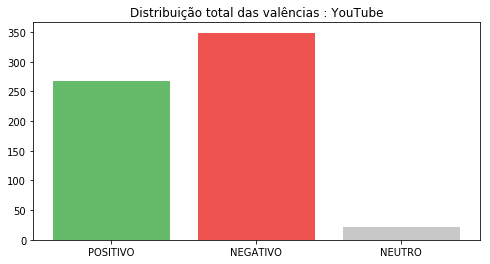

In [26]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,265,2,310,0,0,39,22


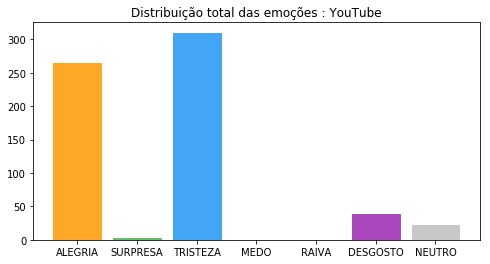

In [27]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)